In [183]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import copy

In [34]:
sns.color_palette("Set2")

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

In [35]:
obj_colors = {
    'rectangle': sns.color_palette("Set2")[0], 
    'triangle': sns.color_palette("Set2")[1], 
    'L': sns.color_palette("Set2")[2], 
}
obj_markers = {
    'rectangle': 's', 
    'triangle': '>', 
    'L': 'o',
}

In [209]:
obj_l = ['obj_'+str(x) for x in range(10)]
obj_l

['obj_0',
 'obj_1',
 'obj_2',
 'obj_3',
 'obj_4',
 'obj_5',
 'obj_6',
 'obj_7',
 'obj_8',
 'obj_9']

# Training Curves

In [210]:
dir_path = 'ConditionedCapsule/training_curves/'

In [211]:
df_l = []
for o in obj_l:
    aux_df = pd.read_csv(dir_path + o + '.csv')
    aux_df['object'] = o
    df_l.append(aux_df)
df = pd.concat(df_l)

<Axes: xlabel='million steps', ylabel='Success Rate (%)'>

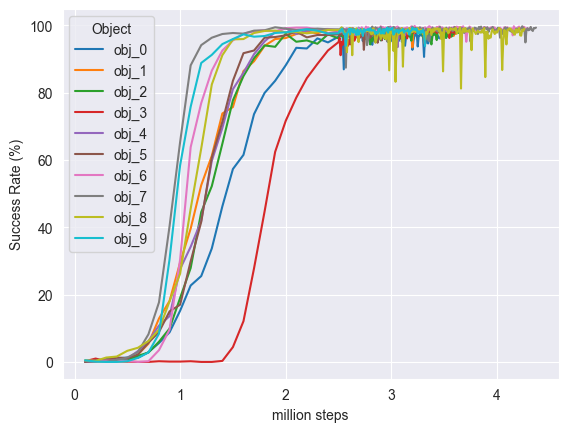

In [212]:
aux_df = df
aux_df['Object'] = aux_df['object']
aux_df['million steps'] = aux_df['Step']/ 1e6
aux_df['Success Rate (%)'] = 100*aux_df['Value']
sns.set_style("darkgrid")
sns.lineplot(aux_df, x='million steps', y='Success Rate (%)', hue='Object')
# plt.savefig('ConditionedCapsule/images/training_curves.png',bbox_inches='tight')

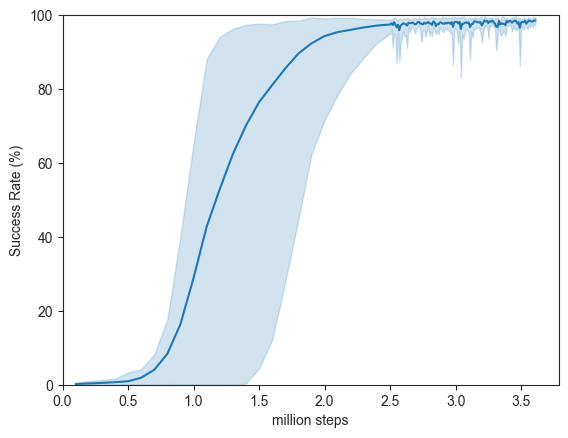

In [213]:
aux_df = copy.deepcopy(df[df['Step'] <= 3_610_000])
aux_df['Object'] = aux_df['object']
aux_df['million steps'] = aux_df['Step']/ 1e6
aux_df['Success Rate (%)'] = 100*aux_df['Value']
sns.set_style("ticks")
ax = sns.lineplot(
    aux_df, x='million steps', y='Success Rate (%)', errorbar=("pi", 100),
    # color=(63/255, 167/255, 214/255)
)
ax.set_ylim(0, 100)
ax.set_xlim(0, )
plt.savefig('ConditionedCapsule/images/training_curves.png',bbox_inches='tight')

# Training Curves => training

In [235]:
dir_path = 'ConditionedCapsule/training_curves_not_eval/'

In [237]:
df_l = []
for o in obj_l:
    aux_df = pd.read_csv(dir_path + o + '_1.csv')
    aux_df['object'] = o
    df_l.append(aux_df)
df = pd.concat(df_l)

In [246]:
sns.color_palette("Set2", 10)

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254),
 (0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961)]

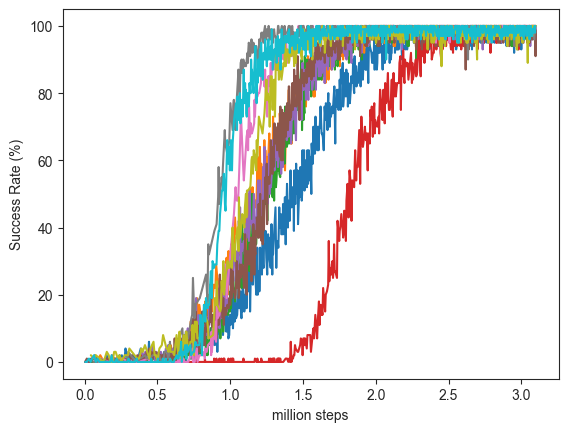

In [252]:
aux_df = copy.deepcopy(df[df['Step'] <= 3_100_000])
aux_df['Object'] = aux_df['object']
aux_df['million steps'] = aux_df['Step']/ 1e6
aux_df['Success Rate (%)'] = 100*aux_df['Value']
sns.set_style("ticks")
sns.lineplot(aux_df, x='million steps', y='Success Rate (%)', hue='Object', legend=None)
plt.savefig('ConditionedCapsule/images/training_curves.png',bbox_inches='tight')

# Capsule Width X Success Rate

In [214]:
dir_path = 'ConditionedCapsule/eval_results/'

In [215]:
df_l = []
for o in obj_l:
    aux_df = pd.read_csv(dir_path + o + '.csv')
    aux_df['object'] = o
    df_l.append(aux_df)
df = pd.concat(df_l)

In [216]:
grouped_df = df.groupby(['object','capsule_width']).apply(lambda x: x.mean())

In [217]:
df_l = []
for o in obj_l:
    aux_df = grouped_df.loc[o].reset_index()
    aux_df['object'] = o
    df_l.append(aux_df)
df = pd.concat(df_l).reset_index(drop=True)

<Axes: xlabel='Capsule Width', ylabel='Success Rate (%)'>

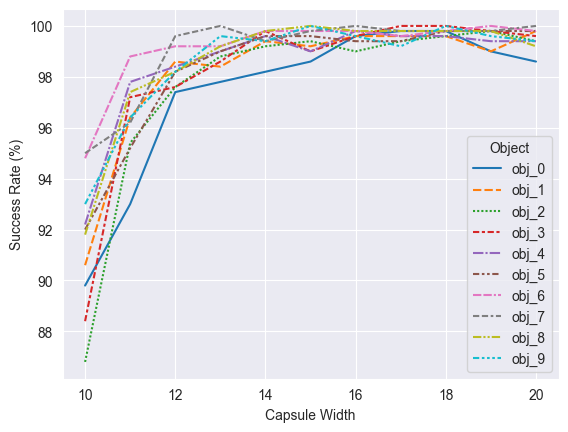

In [218]:
aux_df = df
aux_df['Object'] = aux_df['object']
aux_df['Success Rate (%)'] = 100*aux_df['success']
aux_df['Capsule Width'] = aux_df['capsule_width']
sns.set_style("darkgrid")
sns.lineplot(aux_df, x='Capsule Width', y='Success Rate (%)', hue='Object', style='Object')

<Axes: xlabel='Capsule Width', ylabel='Success Rate (%)'>

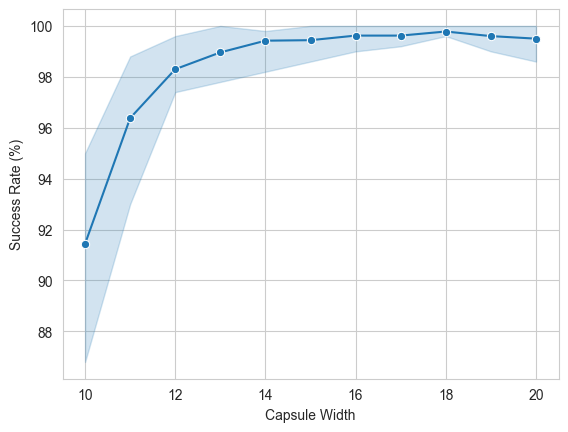

In [219]:
aux_df = df
aux_df['Object'] = aux_df['object']
aux_df['Success Rate (%)'] = 100*aux_df['success']
aux_df['Capsule Width'] = aux_df['capsule_width']
sns.set_style("whitegrid")
sns.lineplot(aux_df, x='Capsule Width', y='Success Rate (%)', errorbar=("pi", 100), marker='o')

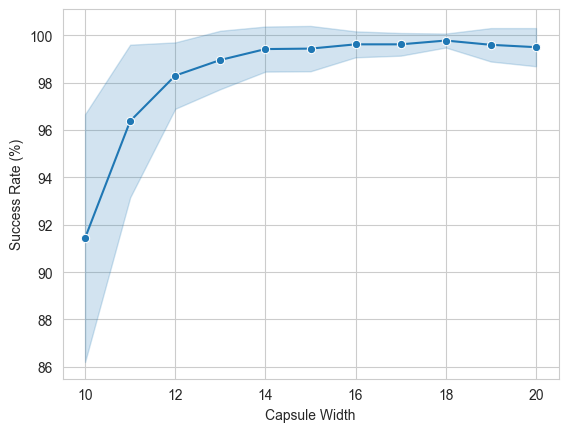

In [220]:
aux_df = df
aux_df['Object'] = aux_df['object']
aux_df['Success Rate (%)'] = 100*aux_df['success']
aux_df['Capsule Width'] = aux_df['capsule_width']
sns.set_style("whitegrid")
sns.lineplot(aux_df, x='Capsule Width', y='Success Rate (%)', errorbar=("sd", 2), marker='o')
plt.savefig('ConditionedCapsule/images/width_x_success.png',bbox_inches='tight')

# Mapless Transportation

In [224]:
import numpy as np
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h

In [228]:
print('Map 1 - 20m')
data = [0.81, 0.835, 0.82, 0.82, 0.89, 0.935, 0.915, 0.855, 0.87, 0.845]
m, h = mean_confidence_interval(data)
print("{:0.2f} +- {:0.2f}".format(100*m, 100*h))

Map 1 - 20m
85.95 +- 3.04


In [229]:
print('Map 2 - 20m')
data = [0.785, 0.825, 0.855, 0.87, 0.835, 0.91, 0.93, 0.875, 0.82, 0.87]
m, h = mean_confidence_interval(data)
print("{:0.2f} +- {:0.2f}".format(100*m, 100*h))

Map 2 - 20m
85.75 +- 3.10


In [230]:
print('Map 3 - 20m')
data = [0.665, 0.66, 0.62, 0.72, 0.66, 0.885, 0.835, 0.75, 0.725, 0.695]
m, h = mean_confidence_interval(data)
print("{:0.2f} +- {:0.2f}".format(100*m, 100*h))

Map 3 - 20m
72.15 +- 5.95


In [234]:
print('Map 1 - 25m')
data = [0.965, 0.96, 0.985, 0.99, 0.97, 1.0, 0.99, 0.985, 0.985, 0.99]
m, h = mean_confidence_interval(data)
print("{:0.2f} +- {:0.2f}".format(100*m, 100*h))

Map 1 - 25m
98.20 +- 0.91


In [233]:
print('Map 2 - 25m')
data = [0.99, 0.995, 0.98, 0.99, 0.98, 0.985, 0.99, 0.98, 0.995, 0.99]
m, h = mean_confidence_interval(data)
print("{:0.2f} +- {:0.2f}".format(100*m, 100*h))

Map 2 - 25m
98.75 +- 0.42


In [232]:
print('Map 3 - 25m')
data = [0.975, 0.96, 0.955, 0.945, 0.975, 0.99, 0.985, 0.975, 0.99, 0.945]
m, h = mean_confidence_interval(data)
print("{:0.2f} +- {:0.2f}".format(100*m, 100*h))

Map 3 - 25m
96.95 +- 1.23


# Capsule Width x Time, when successful

In [82]:
dir_path = 'ConditionedCapsule/eval_results/'

In [83]:
df_l = []
for o in obj_l:
    aux_df = pd.read_csv(dir_path + o + '.csv')
    aux_df['object'] = o
    df_l.append(aux_df)
df = pd.concat(df_l)

In [84]:
df = df[df['success']]

In [85]:
grouped_df = df.groupby(['object','capsule_width']).apply(lambda x: x.mean())
df_l = []
for o in obj_l:
    aux_df = grouped_df.loc[o].reset_index()
    aux_df['object'] = o
    df_l.append(aux_df)
df = pd.concat(df_l).reset_index(drop=True)

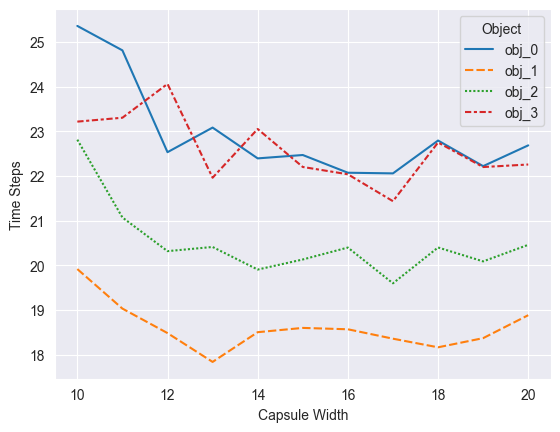

In [87]:
aux_df = df
aux_df['Object'] = aux_df['object']
aux_df['Time Steps'] = aux_df['time_steps']
aux_df['Capsule Width'] = aux_df['capsule_width']
sns.set_style("darkgrid")
sns.lineplot(aux_df, x='Capsule Width', y='Time Steps', hue='Object', style='Object')
plt.savefig('ConditionedCapsule/images/width_x_time.png',bbox_inches='tight')

# Mapless Transportation

In [299]:
df = pd.read_csv('ConditionedCapsule/mapless_transport/results_mapless.csv')

In [317]:
map_l = list(df['map'].unique())

In [304]:
grouped_df = df.groupby(['map', 'obj_id']).apply(lambda x: x['success'].mean())

In [320]:
map_d = {}
for map_i in map_l:
    map_d[map_i] = list(grouped_df.loc[map_i])

In [322]:
for map_i in map_d.keys():
    print(map_i)
    m, h = mean_confidence_interval(map_d[map_i])
    print("{:0.2f} +- {:0.2f}".format(100*m, 100*h))

square_middle_corr_30
99.45 +- 0.52
four_squares_corr_30
99.65 +- 0.34
parallel_walls_corr_30
99.00 +- 0.61
mapless_1_corr_30
99.35 +- 0.63
mapless_2_corr_30
98.55 +- 0.70
square_middle_corr_25
97.80 +- 0.78
four_squares_corr_25
98.55 +- 0.70
parallel_walls_corr_25
96.75 +- 1.28
mapless_1_corr_25
97.20 +- 0.85
mapless_2_corr_25
96.95 +- 0.85
square_middle_corr_20
84.80 +- 3.46
four_squares_corr_20
85.85 +- 3.39
parallel_walls_corr_20
71.05 +- 6.31
mapless_1_corr_20
88.55 +- 3.10
mapless_2_corr_20
71.35 +- 5.36


In [329]:
s = '20 m'
for map_i in ['square_middle_corr_20', 'four_squares_corr_20', 'parallel_walls_corr_20', 'mapless_1_corr_20', 'mapless_2_corr_20']:
    m, h = mean_confidence_interval(map_d[map_i])
    s += ' & ${:0.1f} \\pm {:0.1f}$'.format(100*m, 100*h)
s += '\\\\ \\hline'
print(s)

s = '25 m'
for map_i in ['square_middle_corr_25', 'four_squares_corr_25', 'parallel_walls_corr_25', 'mapless_1_corr_25', 'mapless_2_corr_25']:
    m, h = mean_confidence_interval(map_d[map_i])
    s += ' & ${:0.1f} \\pm {:0.1f}$'.format(100*m, 100*h)
s += '\\\\ \\hline'
print(s)

s = '30 m'
for map_i in ['square_middle_corr_30', 'four_squares_corr_30', 'parallel_walls_corr_30', 'mapless_1_corr_30', 'mapless_2_corr_30']:
    m, h = mean_confidence_interval(map_d[map_i])
    s += ' & ${:0.1f} \\pm {:0.1f}$'.format(100*m, 100*h)
s += '\\\\ \\hline'
print(s)

20 m & $84.8 \pm 3.5$ & $85.9 \pm 3.4$ & $71.0 \pm 6.3$ & $88.5 \pm 3.1$ & $71.4 \pm 5.4$\\ \hline
25 m & $97.8 \pm 0.8$ & $98.6 \pm 0.7$ & $96.7 \pm 1.3$ & $97.2 \pm 0.8$ & $97.0 \pm 0.9$\\ \hline
30 m & $99.5 \pm 0.5$ & $99.6 \pm 0.3$ & $99.0 \pm 0.6$ & $99.4 \pm 0.6$ & $98.6 \pm 0.7$\\ \hline


# Adjust map size

In [289]:
obs_desc = {
        'width': 200.0,
        'height': 140.0,
        'obstacles': [
            {'name':'Rectangle', 'pos':(100.0, 1.0), 'height':2.0, 'width':200.0},
            {'name':'Rectangle', 'pos':(100.0, 139.0), 'height':2.0, 'width':200.0},
            {'name':'Rectangle', 'pos':(1.0, 70.0), 'height':140.0, 'width':2.0},
            {'name':'Rectangle', 'pos':(199.0, 70.0), 'height':140.0, 'width':2.0},

            # Middle lines
            {'name':'Rectangle', 'pos':(100.0, 130.0), 'height':20.0, 'width':2.0},
            {'name':'Rectangle', 'pos':(100.0, 45.0), 'height':90.0, 'width':2.0},

            # Upper left room
            {'name':'Rectangle', 'pos':(9.75, 50.0), 'height':2.0, 'width':19.5},
            {'name':'Rectangle', 'pos':(59.25, 50.0), 'height':2.0, 'width':19.5},
            {'name':'Rectangle', 'pos':(59.25+8.75, 25.0), 'height':50.0, 'width':2.0},

            # Lower left room
            {'name':'Rectangle', 'pos':(25, 82.0), 'height':2.0, 'width':50.0},
            {'name':'Rectangle', 'pos':(49, 82.0+7.0), 'height':14.0, 'width':2.0},
            {'name':'Rectangle', 'pos':(49, 133.0), 'height':14.0, 'width':2.0},

            # Lower right room
            {'name':'Rectangle', 'pos':(132, 115.0), 'height':50.0, 'width':2.0},
            {'name':'Rectangle', 'pos':(190.25, 91.0), 'height':2.0, 'width':19.5},
            {'name':'Rectangle', 'pos':(140.75, 91.0), 'height':2.0, 'width':19.5},

            # Upper right room
            {'name':'Rectangle', 'pos':(132, 4.75), 'height':9.5, 'width':2.0},
            {'name':'Rectangle', 'pos':(132, 44.25), 'height':9.5, 'width':2.0},
            {'name':'Rectangle', 'pos':(165.5, 49.0), 'height':2.0, 'width':69.0},
        ]
    }

r = 20 / 30

adj_obs_desc = []
for o in obs_desc['obstacles']:
    if not o['name'] in ['Rectangle', 'Polygon']:
        print('Erro: obstaculo nao implementado')
        break

    if o['name'] == 'Polygon':
        new_vertices = [
            [v[0]*r, v[1]*r]
            for v in o['vertices']
        ]
        c = o['pos']
        adj_obs_desc.append({
            'name': 'Polygon',
            'pos': [c[0]*r, c[1]*r],
            'vertices': new_vertices
        })
    elif o['name'] == 'Rectangle':
        c = o['pos']
        w = o['width']/2
        h = o['height']/2
        vertices = [
            [c[0] + w, c[1] + h],
            [c[0] - w, c[1] + h],
            [c[0] - w, c[1] - h],
            [c[0] + w, c[1] - h],
        ]
        new_vertices = [
            [v[0]*r, v[1]*r]
            for v in vertices
        ]
        adj_obs_desc.append({
            'name': 'Polygon',
            'pos': [c[0]*r, c[1]*r],
            'vertices': new_vertices
        })

final_d = {
    'width': obs_desc['width']*r,
    'height': obs_desc['height']*r,
    'obstacles': adj_obs_desc
}
final_d

{'width': 133.33333333333331,
 'height': 93.33333333333333,
 'obstacles': [{'name': 'Polygon',
   'pos': [66.66666666666666, 0.6666666666666666],
   'vertices': [[133.33333333333331, 1.3333333333333333],
    [0.0, 1.3333333333333333],
    [0.0, 0.0],
    [133.33333333333331, 0.0]]},
  {'name': 'Polygon',
   'pos': [66.66666666666666, 92.66666666666666],
   'vertices': [[133.33333333333331, 93.33333333333333],
    [0.0, 93.33333333333333],
    [0.0, 92.0],
    [133.33333333333331, 92.0]]},
  {'name': 'Polygon',
   'pos': [0.6666666666666666, 46.666666666666664],
   'vertices': [[1.3333333333333333, 93.33333333333333],
    [0.0, 93.33333333333333],
    [0.0, 0.0],
    [1.3333333333333333, 0.0]]},
  {'name': 'Polygon',
   'pos': [132.66666666666666, 46.666666666666664],
   'vertices': [[133.33333333333331, 93.33333333333333],
    [132.0, 93.33333333333333],
    [132.0, 0.0],
    [133.33333333333331, 0.0]]},
  {'name': 'Polygon',
   'pos': [66.66666666666666, 86.66666666666666],
   'vertic